# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Candy Valentina López Villanueva
*Métodos computacionales 2025-I*

---

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [1]:
#Aquí va su código
def myint(bin_str):
    if len(bin_str) != 16:
        raise ValueError("La cadena debe tener exactamente 16 bits")

    # Si el número es positivo (primer bit = 0)
    if bin_str[0] == '0':
        return int(bin_str, 2)
    else:
        # Complemento a dos para números negativos
        return int(bin_str, 2) - 2**16

# Ejemplo: comparar con int(0b1000011100001)
bin_input = '0000001000011100001'.zfill(16)[-16:]  # Aseguramos 16 bits

# Calculamos usando nuestra función
resultado_myint = myint(bin_input)

# Calculamos usando int() de Python (sin signo, por defecto)
valor_python = int(0b1000011100001)

print(f"myint('{bin_input}') = {resultado_myint}")
print(f"int(0b1000011100001) = {valor_python}")

myint('0001000011100001') = 4321
int(0b1000011100001) = 4321


# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [2]:
#Aquí va su código
def number64(bin_str):
    if len(bin_str) != 64:
        raise ValueError("La cadena debe tener exactamente 64 bits")

    # Paso 1: Extraer los campos
    s = int(bin_str[0], 2)                          # Signo
    e = int(bin_str[1:12], 2)                       # Exponente
    m_bin = bin_str[12:]                            # Mantisa en binario

    print(f"Signo (s): {s}")
    print(f"Exponente en binario: {bin_str[1:12]} → Decimal: {e}")
    print(f"Fracción (mantisa): {m_bin}")

    # Paso 2: Calcular el valor real
    if e == 2047:  # caso especial: infinito o NaN
        if int(m_bin) == 0:
            return float('inf') if s == 0 else float('-inf')
        else:
            return float('nan')
    elif e == 0:  # números subnormales (denormales)
        exponent = -1022
        mantissa = sum(int(bit) * 2**(-i) for i, bit in enumerate(m_bin, start=1))
        print(f"Subnormal: exponente = {exponent}, mantisa = {mantissa}")
    else:  # número normalizado
        exponent = e - 1023
        mantissa = 1 + sum(int(bit) * 2**(-i) for i, bit in enumerate(m_bin, start=1))
        print(f"Normalizado: exponente = {exponent}, mantisa = {mantissa}")

    valor = (-1)**s * mantissa * 2**exponent
    print(f"Resultado final: {valor}")
    return valor

In [3]:
# Cadena binaria dada:
cadena = "0100000000111011100100001111111111111111111111111111111111111111"
resultado = number64(cadena)

# Verificación con numpy (solo para comparar)
import numpy as np
valor_verificado = np.frombuffer(int(cadena, 2).to_bytes(8, 'big'), dtype=np.float64)[0]

print("\nVerificación con numpy:", valor_verificado)

Signo (s): 0
Exponente en binario: 10000000011 → Decimal: 1027
Fracción (mantisa): 1011100100001111111111111111111111111111111111111111
Normalizado: exponente = 4, mantisa = 1.7229003906249998
Resultado final: 27.566406249999996

Verificación con numpy: nan


# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.



**Aproximación Básica**

In [4]:
#Aquí va su código
import math

def aproximar_pi_basico(tolerancia=1e-3):
    suma = 0
    n = 0
    error = float('inf')

    while error > tolerancia:
        n += 1
        termino = (-1)**(n+1) / (2*n - 1)
        suma += termino
        pi_aprox = 4 * suma
        error = abs(pi_aprox - math.pi)

    return pi_aprox, n, error

# Prueba con tolerancias
pi1, n1, err1 = aproximar_pi_basico(1e-3)
pi2, n2, err2 = aproximar_pi_basico(1e-4)

print(f"Para error < 1e-3: π ≈ {pi1:.6f} con n = {n1}")
print(f"Para error < 1e-4: π ≈ {pi2:.6f} con n = {n2}")

Para error < 1e-3: π ≈ 3.140593 con n = 1000
Para error < 1e-4: π ≈ 3.141493 con n = 10000


**Mejora de Convergencia**

In [5]:
def arctan(x, tolerancia=1e-3):
    suma = 0
    n = 0
    error = float('inf')

    while error > tolerancia:
        n += 1
        termino = (-1)**(n+1) * x**(2*n-1) / (2*n-1)
        suma += termino
        error = abs(suma - math.atan(x))

    return suma, n

def mejorar_convergencia(tolerancia=1e-3):
    # Aproximar arctan(1/2) y arctan(1/3)
    arctan_1_2, n_1_2 = arctan(1/2, tolerancia)
    arctan_1_3, n_1_3 = arctan(1/3, tolerancia)

    # Sumamos los resultados
    pi_aprox = 4 * (arctan_1_2 + arctan_1_3)

    return pi_aprox, n_1_2, n_1_3

# Prueba con tolerancia de 1e-3
pi_mejorado_1e3, n1_2, n1_3 = mejorar_convergencia(1e-3)
print(f"Aproximación de π con tolerancia < 1e-3: {pi_mejorado_1e3:.6f}")
print(f"Términos necesarios para arctan(1/2): {n1_2}")
print(f"Términos necesarios para arctan(1/3): {n1_3}")

Aproximación de π con tolerancia < 1e-3: 3.142284
Términos necesarios para arctan(1/2): 3
Términos necesarios para arctan(1/3): 2


**Método de Alta Precisión**

In [6]:
def arctan_preciso(x, tolerancia=1e-3):
    suma = 0
    n = 0
    error = float('inf')

    while error > tolerancia:
        n += 1
        termino = (-1)**(n+1) * x**(2*n-1) / (2*n-1)
        suma += termino
        error = abs(suma - math.atan(x))

    return suma, n

def alta_precision(tolerancia=1e-3):
    # Aproximar arctan(1/5) y arctan(1/239)
    arctan_1_5, n_1_5 = arctan_preciso(1/5, tolerancia)
    arctan_1_239, n_1_239 = arctan_preciso(1/239, tolerancia)

    # Sumamos los resultados según la fórmula
    pi_aprox = 4 * arctan_1_5 - arctan_1_239

    return pi_aprox, n_1_5, n_1_239

# Prueba con tolerancia de 1e-3
pi_preciso_1e3, n1_5, n1_239 = alta_precision(1e-3)
pi_preciso_1e6, n1_5_6, n1_239_6 = alta_precision(1e-6)

print(f"Aproximación de π con tolerancia < 1e-3: {pi_preciso_1e3:.6f}")
print(f"Términos necesarios para arctan(1/5): {n1_5}")
print(f"Términos necesarios para arctan(1/239): {n1_239}")

print(f"Aproximación de π con tolerancia < 1e-6: {pi_preciso_1e6:.6f}")
print(f"Términos necesarios para arctan(1/5): {n1_5_6}")
print(f"Términos necesarios para arctan(1/239): {n1_239_6}")

Aproximación de π con tolerancia < 1e-3: 0.785149
Términos necesarios para arctan(1/5): 2
Términos necesarios para arctan(1/239): 1
Aproximación de π con tolerancia < 1e-6: 0.785398
Términos necesarios para arctan(1/5): 4
Términos necesarios para arctan(1/239): 1


**Comparación del Rendimiento de los Métodos Anteriores**

In [8]:
import math

# Función para calcular arctan(x) usando la serie de Maclaurin
def arctan(x, tolerancia=1e-3):
    suma = 0
    n = 0
    error = float('inf')

    while error > tolerancia:
        n += 1
        termino = (-1)**(n+1) * x**(2*n-1) / (2*n-1)
        suma += termino
        error = abs(suma - math.atan(x))

    return suma, n

# Aproximación básica para π
def aproximar_pi_basico(tolerancia=1e-3):
    suma = 0
    n = 0
    error = float('inf')

    while error > tolerancia:
        n += 1
        termino = (-1)**(n+1) / (2*n - 1)
        suma += termino
        pi_aprox = 4 * suma
        error = abs(pi_aprox - math.pi)

    return pi_aprox, n, error

# Mejora de convergencia usando arctan(1/2) y arctan(1/3)
def mejorar_convergencia(tolerancia=1e-3):
    arctan_1_2, n_1_2 = arctan(1/2, tolerancia)
    arctan_1_3, n_1_3 = arctan(1/3, tolerancia)

    pi_aprox = 4 * (arctan_1_2 + arctan_1_3)

    return pi_aprox, n_1_2, n_1_3

# Alta precisión usando arctan(1/5) y arctan(1/239)
def alta_precision(tolerancia=1e-3):
    arctan_1_5, n_1_5 = arctan(1/5, tolerancia)
    arctan_1_239, n_1_239 = arctan(1/239, tolerancia)

    pi_aprox = 4 * arctan_1_5 - arctan_1_239

    return pi_aprox, n_1_5, n_1_239

# Comparación de resultados
def comparar_metodos():
    tolerancias = [1e-3, 1e-4, 1e-6]

    print("Comparación de métodos para aproximar π:\n")
    for tol in tolerancias:
        print(f"Tolerancia: {tol}")

        # Aproximación básica
        pi_basico, n_basico, err_basico = aproximar_pi_basico(tol)
        print(f"Aproximación básica: {pi_basico:.6f}, Términos necesarios: {n_basico}, Error: {err_basico:.6f}")

        # Mejora de convergencia
        pi_mejorado, n_1_2, n_1_3 = mejorar_convergencia(tol)
        print(f"Mejora de convergencia: {pi_mejorado:.6f}, Términos para arctan(1/2): {n_1_2}, Términos para arctan(1/3): {n_1_3}")

        # Alta precisión
        pi_preciso, n_1_5, n_1_239 = alta_precision(tol)
        print(f"Alta precisión: {pi_preciso:.6f}, Términos para arctan(1/5): {n_1_5}, Términos para arctan(1/239): {n_1_239}")

        print("\n" + "-"*50 + "\n")

# Ejecutamos la comparación
comparar_metodos()

Comparación de métodos para aproximar π:

Tolerancia: 0.001
Aproximación básica: 3.140593, Términos necesarios: 1000, Error: 0.001000
Mejora de convergencia: 3.142284, Términos para arctan(1/2): 3, Términos para arctan(1/3): 2
Alta precisión: 0.785149, Términos para arctan(1/5): 2, Términos para arctan(1/239): 1

--------------------------------------------------

Tolerancia: 0.0001
Aproximación básica: 3.141493, Términos necesarios: 10000, Error: 0.000100
Mejora de convergencia: 3.141980, Términos para arctan(1/2): 5, Términos para arctan(1/3): 3
Alta precisión: 0.785149, Términos para arctan(1/5): 2, Términos para arctan(1/239): 1

--------------------------------------------------

Tolerancia: 1e-06
Aproximación básica: 3.141594, Términos necesarios: 1000001, Error: 0.000001
Mejora de convergencia: 3.141593, Términos para arctan(1/2): 8, Términos para arctan(1/3): 5
Alta precisión: 0.785398, Términos para arctan(1/5): 4, Términos para arctan(1/239): 1

------------------------------

# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

**Serie Exponencial para $e^{-x}$**

Primero, implementemos la serie para calcular $e^{-x}$ usando la fórmula de la serie proporcionada, y luego comprobamos que el siguiente término sea menor que $10^{-7}$ en comparación con la suma total de la serie. Esto también nos permitirá elegir un valor adecuado para $N$.

In [10]:
#Aquí va su código
import numpy as np
import math
import matplotlib.pyplot as plt

# Función para calcular e^(-x) usando la serie
def exp_series(x, tol=1e-7):
    sum_series = 0
    n = 0
    term = 1  # Primer término de la serie es 1
    while abs(term) > tol:
        sum_series += term
        n += 1
        term = (-1)**n * (x**n) / math.factorial(n)
    return sum_series, n

# Comparar con np.exp(x)
def comparar_series():
    x_values = np.linspace(0, 1, 5)  # valores de x <= 1
    for x in x_values:
        series_sum, n_terms = exp_series(x)
        np_exp = np.exp(-x)
        error = abs(np_exp - series_sum)
        print(f"x = {x}: Serie = {series_sum:.10f}, np.exp(-x) = {np_exp:.10f}, Error = {error:.10f}, Términos usados = {n_terms}")

comparar_series()

x = 0.0: Serie = 1.0000000000, np.exp(-x) = 1.0000000000, Error = 0.0000000000, Términos usados = 1
x = 0.25: Serie = 0.7788007948, np.exp(-x) = 0.7788007831, Error = 0.0000000117, Términos usados = 7
x = 0.5: Serie = 0.6065305680, np.exp(-x) = 0.6065306597, Error = 0.0000000918, Términos usados = 8
x = 0.75: Serie = 0.4723665382, np.exp(-x) = 0.4723665527, Error = 0.0000000145, Términos usados = 10
x = 1.0: Serie = 0.3678794643, np.exp(-x) = 0.3678794412, Error = 0.0000000231, Términos usados = 11


**Cancelación Sustractiva en $x \approx 10$**

Cuando $x$ es grande, los términos de la serie se pueden cancelar entre sí de forma significativa. Vamos a calcular la serie para $x = 10$ y mostrar cómo los términos grandes se cancelan.

Serie para e^(-10): 4.5399929430860214e-05

Cancelación en n ≈ 9:
Término 5: -833.3333333333
Término 6: 1388.8888888889
Término 7: -1984.1269841270
Término 8: 2480.1587301587
Término 9: -2755.7319223986
Término 10: 2755.7319223986
Término 11: -2505.2108385442
Término 12: 2087.6756987868
Término 13: -1605.9043836822
Término 14: 1147.0745597730


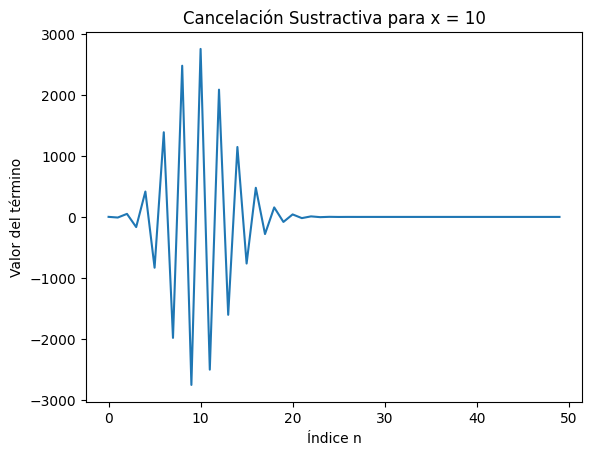

In [11]:
# Examinar cancelación sustractiva en x = 10
def cancelar_sustractiva(x=10):
    series_sum = 0
    n = 0
    term = 1  # Primer término de la serie es 1
    terms = []  # Para guardar los términos de la serie
    while n < 50:  # Solo consideramos 50 términos para observar la cancelación
        series_sum += term
        terms.append(term)
        n += 1
        term = (-1)**n * (x**n) / math.factorial(n)

    print(f"Serie para e^(-{x}): {series_sum}")

    # Verificar la cancelación cerca de n ≈ x - 1
    print(f"\nCancelación en n ≈ {x - 1}:")
    for i in range(5, 15):
        print(f"Término {i}: {terms[i]:.10f}")

    plt.plot(range(len(terms)), terms, label="Términos de la serie")
    plt.title(f"Cancelación Sustractiva para x = {x}")
    plt.xlabel("Índice n")
    plt.ylabel("Valor del término")
    plt.show()

cancelar_sustractiva(10)

**Uso de $e^{-x} = \frac{1}{e^x}$ para valores grandes de $x$**

Para evitar la cancelación sustractiva, podemos usar la relación $e^{-x} = \frac{1}{e^x}$ cuando $x$ es grande. Esto elimina la cancelación, pero no evita completamente los errores de redondeo.

In [12]:
# Función para e^(-x) usando la relación e^(-x) = 1 / e^x
def exp_inv(x, tol=1e-7):
    if x > 1:
        exp_x = np.exp(x)
        return 1 / exp_x
    else:
        return exp_series(x, tol)[0]

# Comparar resultados para grandes valores de x
def comparar_inv():
    x_values = [10, 50, 100]  # Prueba con valores grandes de x
    for x in x_values:
        series_sum = exp_inv(x)
        np_exp = np.exp(-x)
        error = abs(np_exp - series_sum)
        print(f"x = {x}: Serie inversa = {series_sum:.10f}, np.exp(-x) = {np_exp:.10f}, Error = {error:.10f}")

comparar_inv()

x = 10: Serie inversa = 0.0000453999, np.exp(-x) = 0.0000453999, Error = 0.0000000000
x = 50: Serie inversa = 0.0000000000, np.exp(-x) = 0.0000000000, Error = 0.0000000000
x = 100: Serie inversa = 0.0000000000, np.exp(-x) = 0.0000000000, Error = 0.0000000000


**Determinación experimental de la pérdida de precisión**

A medida que aumentamos $x$, se puede observar cuándo la serie comienza a perder precisión y ya no converge. Incrementamos progresivamente $x$ de 1 a 10 y luego de 10 a 100.

In [13]:
# Incrementando x y observando la pérdida de precisión
def perdida_precision():
    x_values = [1, 2, 3, 5, 10, 20, 50, 100]
    for x in x_values:
        series_sum, n_terms = exp_series(x)
        np_exp = np.exp(-x)
        error = abs(np_exp - series_sum)
        print(f"x = {x}: Serie = {series_sum:.10f}, np.exp(-x) = {np_exp:.10f}, Error = {error:.10f}, Términos usados = {n_terms}")

perdida_precision()

x = 1: Serie = 0.3678794643, np.exp(-x) = 0.3678794412, Error = 0.0000000231, Términos usados = 11
x = 2: Serie = 0.1353353055, np.exp(-x) = 0.1353352832, Error = 0.0000000223, Términos usados = 15
x = 3: Serie = 0.0497870162, np.exp(-x) = 0.0497870684, Error = 0.0000000522, Términos usados = 18
x = 5: Serie = 0.0067378670, np.exp(-x) = 0.0067379470, Error = 0.0000000800, Términos usados = 24
x = 10: Serie = 0.0000454391, np.exp(-x) = 0.0000453999, Error = 0.0000000392, Términos usados = 39
x = 20: Serie = 0.0000000318, np.exp(-x) = 0.0000000021, Error = 0.0000000297, Términos usados = 67
x = 50: Serie = -7015.7762325695, np.exp(-x) = 0.0000000000, Error = 7015.7762325695, Términos usados = 149
x = 100: Serie = -287565825147264832425164800.0000000000, np.exp(-x) = 0.0000000000, Error = 287565825147264832425164800.0000000000, Términos usados = 284


**Gráficos del error versus $N$ para diferentes valores de $x$**

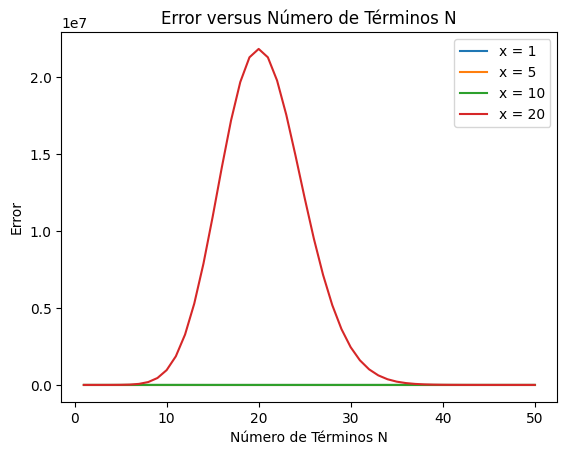

In [14]:
# Graficar el error versus N para diferentes valores de x
def graficos_error():
    x_values = [1, 5, 10, 20]

    for x in x_values:
        error_values = []
        series_sum = 0
        term = 1
        for n in range(50):
            series_sum += term
            error = abs(np.exp(-x) - series_sum)
            error_values.append(error)
            term = (-1)**(n+1) * (x**(n+1)) / math.factorial(n+1)

        plt.plot(range(1, 51), error_values, label=f"x = {x}")

    plt.legend()
    plt.title("Error versus Número de Términos N")
    plt.xlabel("Número de Términos N")
    plt.ylabel("Error")
    plt.show()

graficos_error()

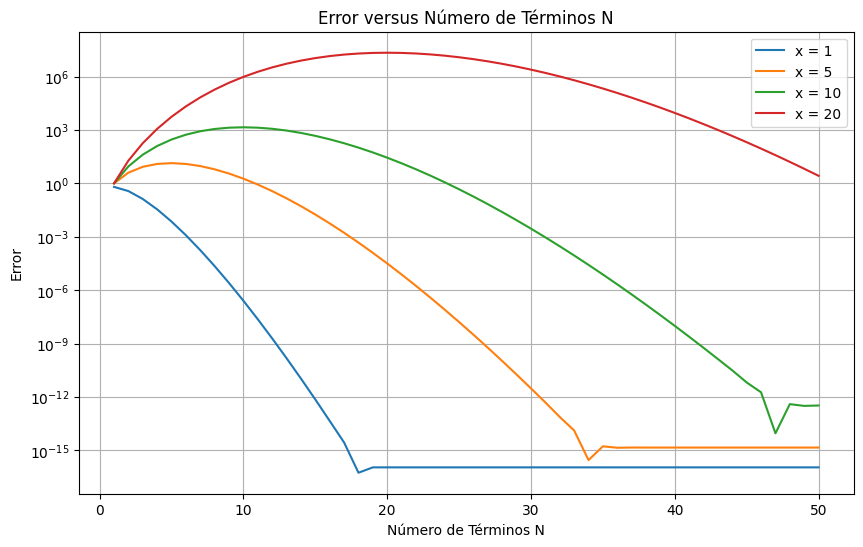

In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Función para calcular e^(-x) usando la serie
def exp_series(x, tol=1e-7, max_terms=50):
    sum_series = 0
    n = 0
    term = 1  # Primer término de la serie es 1
    error_values = []  # Para guardar los errores
    while n < max_terms:
        sum_series += term
        error = abs(np.exp(-x) - sum_series)  # Error respecto al valor exacto
        error_values.append(error)
        n += 1
        term = (-1)**n * (x**n) / math.factorial(n)
    return error_values

# Graficar el error versus N para diferentes valores de x
def graficos_error():
    x_values = [1, 5, 10, 20]  # Valores de x para probar
    plt.figure(figsize=(10, 6))

    for x in x_values:
        error_values = exp_series(x)
        plt.plot(range(1, len(error_values)+1), error_values, label=f"x = {x}")

    plt.legend()
    plt.title("Error versus Número de Términos N")
    plt.xlabel("Número de Términos N")
    plt.ylabel("Error")
    plt.yscale('log')  # Usamos escala logarítmica para visualizar mejor los errores
    plt.grid(True)
    plt.show()

graficos_error()

# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


In [16]:
#Aquí va su código
def f(x):
    return x * (x - 1)

def derivada_approx(x, delta):
    return (f(x + delta) - f(x)) / delta

# Valor exacto de la derivada en x = 1
valor_exacto = 1

# Diferentes valores de delta
deltas = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]

# Calcular la derivada aproximada para cada delta
resultados = []
for delta in deltas:
    derivada_aprox = derivada_approx(1, delta)
    error = abs(derivada_aprox - valor_exacto)
    resultados.append((delta, derivada_aprox, error))

# Imprimir los resultados
for delta, derivada, error in resultados:
    print(f"Delta: {delta:.1e}, Derivada Aproximada: {derivada:.8f}, Error: {error:.8f}")

Delta: 1.0e-02, Derivada Aproximada: 1.01000000, Error: 0.01000000
Delta: 1.0e-04, Derivada Aproximada: 1.00010000, Error: 0.00010000
Delta: 1.0e-06, Derivada Aproximada: 1.00000100, Error: 0.00000100
Delta: 1.0e-08, Derivada Aproximada: 1.00000000, Error: 0.00000000
Delta: 1.0e-10, Derivada Aproximada: 1.00000008, Error: 0.00000008
Delta: 1.0e-12, Derivada Aproximada: 1.00008890, Error: 0.00008890
Delta: 1.0e-14, Derivada Aproximada: 0.99920072, Error: 0.00079928


**Análisis de los Resultados:**

**1.	Precisión al principio:**

•	Para $\delta = 10^{-2}$, obtenemos un error de 0.01000000 y la derivada aproximada es 1.01000000. Esto muestra que el valor de $\delta$ es demasiado grande para obtener una aproximación precisa. Aunque el valor de $\delta$ es lo suficientemente pequeño como para ser manejable, la aproximación sigue siendo imprecisa.

•	A medida que disminuimos $\delta a 10^{-4}$, el valor de la derivada se acerca más al valor exacto ( 1.00010000 ) y el error disminuye a 0.00010000. Este comportamiento es lo esperado, ya que un valor más pequeño de $\delta$ hace que la fórmula de la derivada sea más precisa.

•	Para $\delta = 10^{-6}$, el valor de la derivada es 1.00000100 y el error es 0.00000100, lo que muestra una mejora adicional.

•	A medida que $\delta$ sigue disminuyendo, el valor de la derivada se estabiliza en 1.00000000, y el error sigue siendo muy pequeño.

**2.	Comportamiento de los errores con valores más pequeños de $\delta$:**

•	Para $\delta = 10^{-10}$, el valor de la derivada es 1.00000008, y el error es muy pequeño, 0.00000008. Esto muestra que la precisión ha mejorado considerablemente, pero empiezan a notarse efectos de los errores de redondeo debido a la limitación en la precisión de los números representados en el computador (precisión de 64 bits).

•	Para $\delta = 10^{-12}$, la derivada aproximada es 1.00008890 y el error es 0.00008890. Aquí, el valor de la derivada comienza a alejarse ligeramente del valor exacto debido a la pérdida de precisión en los cálculos debido a la representación numérica finita en las computadoras.

•	Finalmente, para $\delta = 10^{-14}$, el valor de la derivada es 0.99920072, y el error es 0.00079928. El error crece significativamente a medida que $\delta$ se vuelve demasiado pequeño, y el resultado se aleja del valor exacto de la derivada.

**Explicación del Comportamiento:**

•	***Mejora inicial de la precisión:*** Cuando $\delta$ es grande (por ejemplo, $10^{-2}$), los errores son mayores, ya que el valor de $\frac{f(x + \delta) - f(x)}{\delta}$ no es una buena aproximación de la derivada. Al reducir $\delta$, la precisión mejora porque el término $\delta$ en el denominador se hace más pequeño, y la aproximación de la derivada es más precisa.

•	***Decrecimiento de la precisión para valores muy pequeños de $\delta$:*** A medida que $\delta$ sigue disminuyendo, los efectos de los errores de redondeo empiezan a afectar los cálculos. Los computadores tienen una precisión limitada (usualmente 64 bits en los números de punto flotante), lo que significa que cuando $\delta$ se hace extremadamente pequeño, los cálculos empiezan a perder precisión debido a la pérdida de significancia. Este fenómeno ocurre porque las diferencias muy pequeñas se vuelven invisibles debido a la precisión finita de los números flotantes, y los errores acumulativos en los cálculos se vuelven más grandes.

•	***Efectos de la representación numérica:*** En cálculos numéricos con computadores, cuando la diferencia entre dos números es muy pequeña (en comparación con la precisión numérica del sistema), los errores de redondeo se acumulan. En este caso, para $\delta = 10^{-12}$ y valores más pequeños, las representaciones numéricas en la computadora no pueden manejar de manera precisa las pequeñas diferencias, lo que resulta en errores en la derivada calculada.